In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_csv('essays.csv', encoding='mac_roman') 


In [66]:
# Data Summary
print("Data Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of Personality Traits
trait_distribution = df[["cEXT", "cNEU", "cAGR", "cCON", "cOPN"]].apply(pd.Series.value_counts).fillna(0)
print("\nDistribution of Personality Traits:")
print(trait_distribution)

# Convert categorical values to numerical
df_numerical = df.replace({'y': 1, 'n': 0})

# Correlation matrix
correlation_matrix = df_numerical[["cEXT", "cNEU", "cAGR", "cCON", "cOPN"]].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Analyze the length of the texts
df["text_length"] = df["TEXT"].apply(len)

# Summary statistics of text length
text_length_summary = df["text_length"].describe()
print("\nSummary Statistics of Text Length:")
print(text_length_summary)

# Relation between text length and personality traits
trait_vs_length = df_numerical.copy()
trait_vs_length["text_length"] = df["text_length"]

# Calculate the correlation matrix excluding non-numeric columns
correlation_matrix = trait_vs_length[["cEXT", "cNEU", "cAGR", "cCON", "cOPN", "text_length"]].corr()

# Correlation between text length and personality traits
length_trait_correlation = correlation_matrix["text_length"].drop("text_length")
print("\nCorrelation between Text Length and Personality Traits:")
print(length_trait_correlation)


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #AUTHID  2467 non-null   object
 1   TEXT     2467 non-null   object
 2   cEXT     2467 non-null   object
 3   cNEU     2467 non-null   object
 4   cAGR     2467 non-null   object
 5   cCON     2467 non-null   object
 6   cOPN     2467 non-null   object
dtypes: object(7)
memory usage: 135.0+ KB
None

Missing Values:
#AUTHID    0
TEXT       0
cEXT       0
cNEU       0
cAGR       0
cCON       0
cOPN       0
dtype: int64

Distribution of Personality Traits:
   cEXT  cNEU  cAGR  cCON  cOPN
n  1191  1234  1157  1214  1196
y  1276  1233  1310  1253  1271

Correlation Matrix:
          cEXT      cNEU      cAGR      cCON      cOPN
cEXT  1.000000 -0.160195  0.124240  0.136156  0.078890
cNEU -0.160195  1.000000 -0.189639 -0.147965 -0.047436
cAGR  0.124240 -0.189639  1.000000  0.134277  0.018020
cCON 

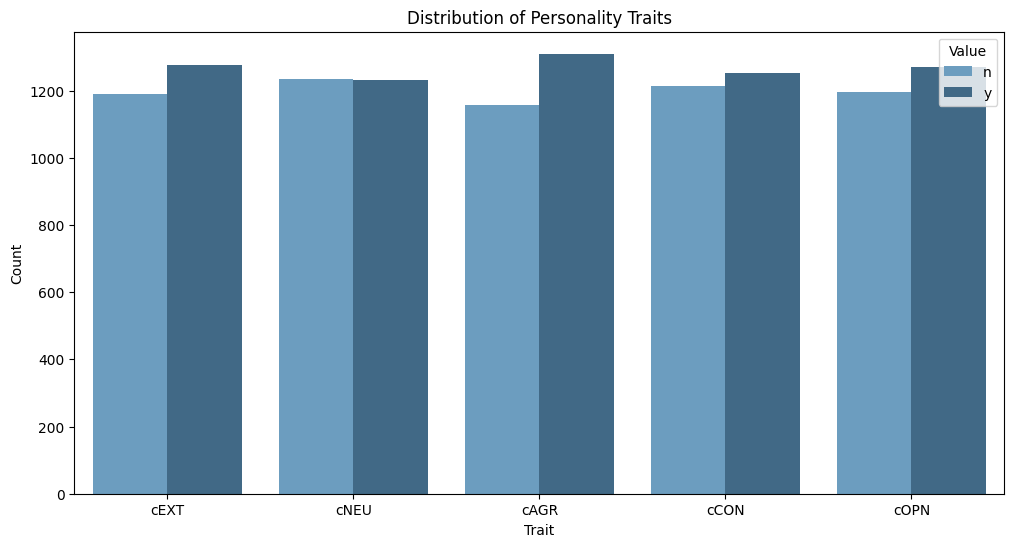

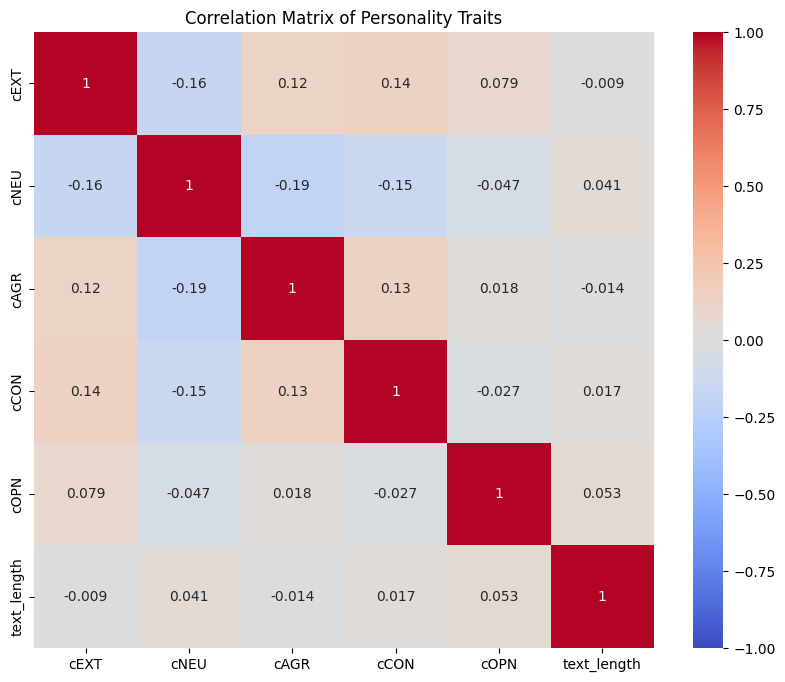

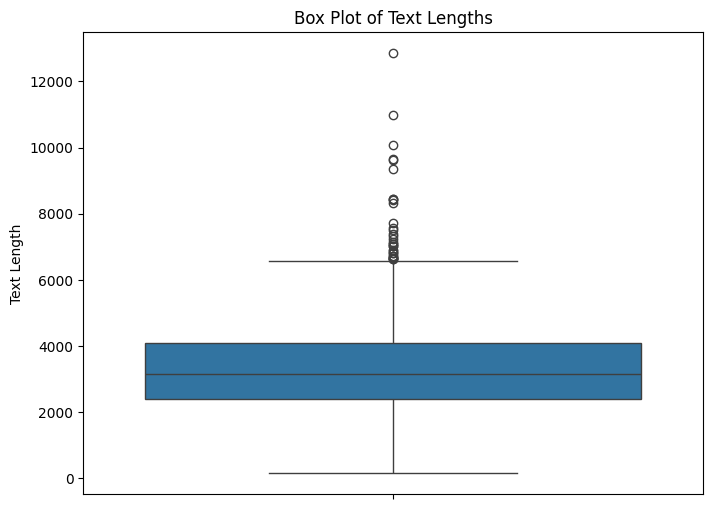

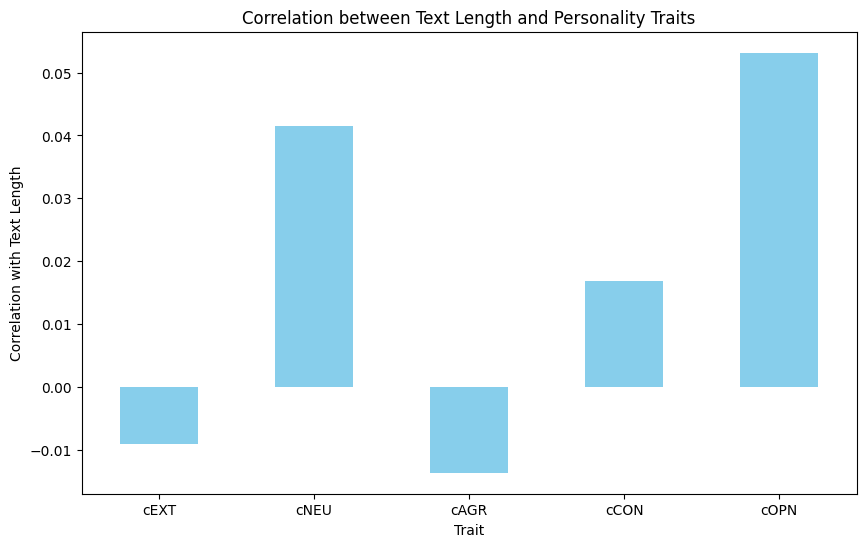

In [67]:
# Plot 1: Bar Plot for Distribution of Personality Traits
# Properly formatting the melted DataFrame for correct plotting
trait_distribution = trait_distribution.reset_index().melt(id_vars='index')
trait_distribution.columns = ['Value', 'Trait', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=trait_distribution, x='Trait', y='Count',palette='Blues_d', hue='Value')
plt.title('Distribution of Personality Traits')
plt.xlabel('Trait')
plt.ylabel('Count')
plt.legend(title='Value')
plt.show()

# Plot 2: Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Personality Traits')
plt.show()

# Plot 3: Box Plot for Text Length
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='text_length')
plt.title('Box Plot of Text Lengths')
plt.ylabel('Text Length')
plt.show()

# Plot 4: Bar Plot for Correlation between Text Length and Personality Traits
plt.figure(figsize=(10, 6))
length_trait_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation between Text Length and Personality Traits')
plt.xlabel('Trait')
plt.ylabel('Correlation with Text Length')
plt.xticks(rotation=0)
plt.show()